In [1]:
from fastai.vision import *

In [2]:
classes = ['CASE', 'CPU', 'GPU', 'HDD', 'KeyBoard', 'Mouse', 'RAM', 'SSD']

# Getting The Dataset

In [5]:
folder_names = ['CASE', 'CPU', 'GPU', 'HDD', 'KeyBoard', 'Mouse', 'RAM', 'SSD']
files = ['CASE.csv', 'CPU.csv', 'GPU.csv', 'HDD.csv', 'KB.csv', 'M.csv', 'RAM.csv', 'SSD.csv']

# def image_downloader(folder_names, files):
# for some reason turning this into a function causes a traceback error? :-()
for i in range(len(files)):
    file = files[i]
    folder = folder_names[i]

    path = Path('data/Parts')
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

    download_images(path/file, dest, max_pics=200)

In [6]:
# Clean out files that aren't actually images
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

CASE


CPU


GPU


HDD


KeyBoard


Mouse


RAM


SSD


# View The Data

In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

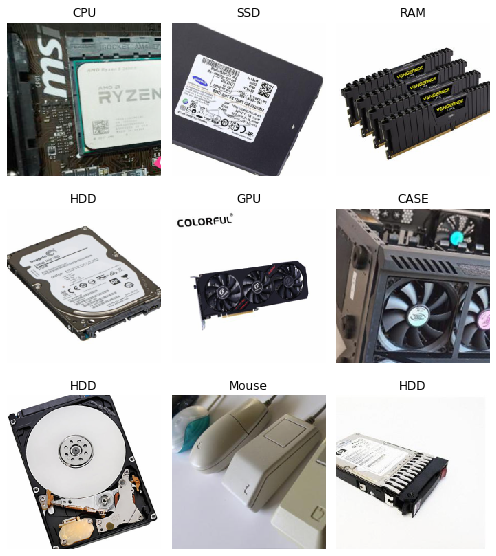

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['CASE', 'CPU', 'GPU', 'HDD', 'KeyBoard', 'Mouse', 'RAM', 'SSD'],
 8,
 1195,
 298)

# Train The Model


In [13]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.064923,0.725979,0.194631,00:27
1,1.214738,0.680019,0.140940,00:24
2,0.853553,0.616826,0.151007,00:24
3,0.660064,0.607668,0.154362,00:24


In [15]:
learn.save('stage-1')

In [17]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


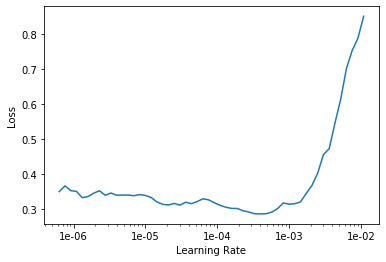

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.355795,0.608753,0.147651,00:24
1,0.265422,0.557455,0.147651,00:24


In [21]:
learn.save('stage-2')

# Model Interpretation

In [22]:
learn.load('stage-2');

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

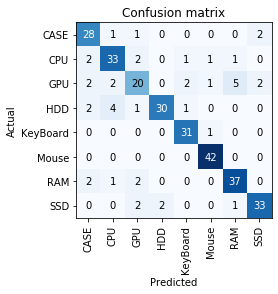

In [24]:
interp.plot_confusion_matrix()

# Cleaning Up

In [26]:
from fastai.widgets import *

In [27]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [28]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [29]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [30]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [31]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [32]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

# Putting It All Together

In [33]:
learn.export()

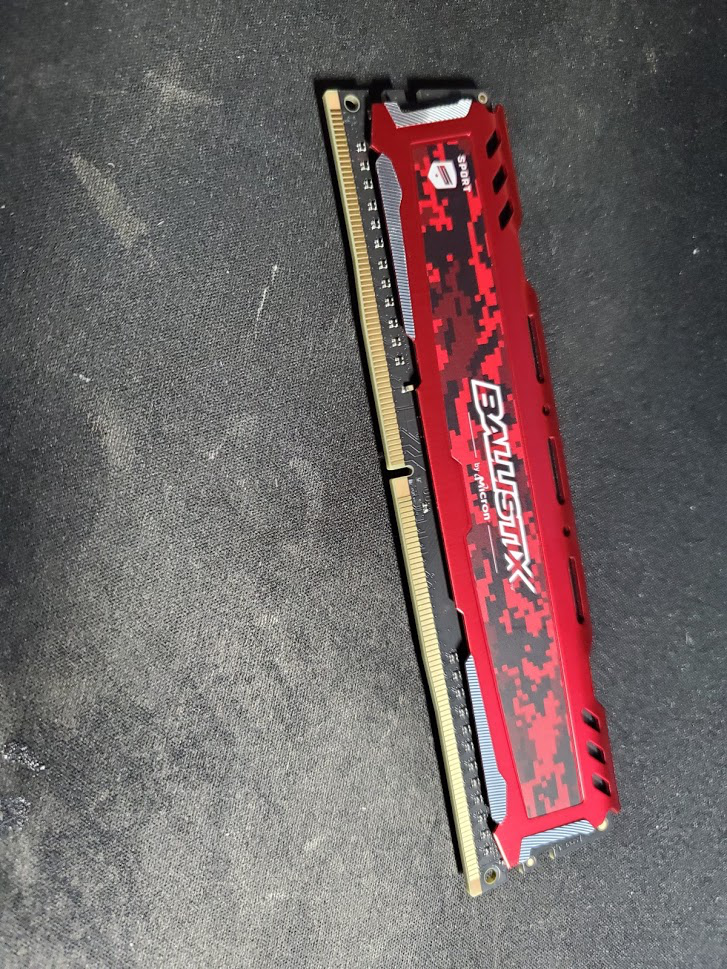

In [34]:
# This is a photo of some RAM I installed today
img = open_image(path/'RAM'/'RAM.jpg')
img

In [35]:
learn = load_learner(path)

In [36]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category RAM